<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: 979 rows, 6 columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [6]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [33]:
# Answer:
movies.sort_values(by='duration').iloc[[0,-1]]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

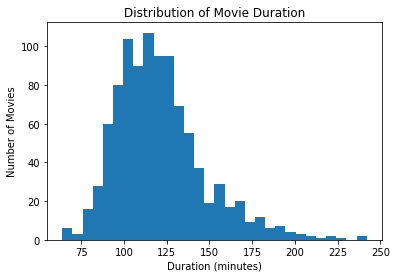

In [94]:
# Answer:
plt.hist(movies['duration'],bins=30);
plt.title('Distribution of Movie Duration');
plt.xlabel('Duration (minutes)');
plt.ylabel('Number of Movies');

#### Use a box plot to display that same data.

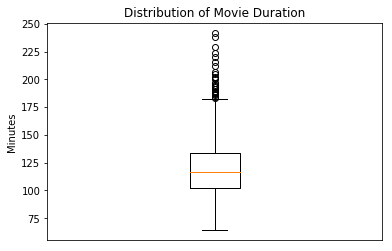

In [95]:
# Answer:
plt.boxplot(movies['duration']);
plt.title('Distribution of Movie Duration');
plt.ylabel('Minutes');
plt.xticks([]);


## Intermediate level

#### Count how many movies have each of the content ratings.

In [83]:
ratings = movies.groupby('content_rating').content_rating.count()
ratings

content_rating
G           33
NC-17       12
PG         125
PG-13      189
R          460
UNRATED    160
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Number of Movies')

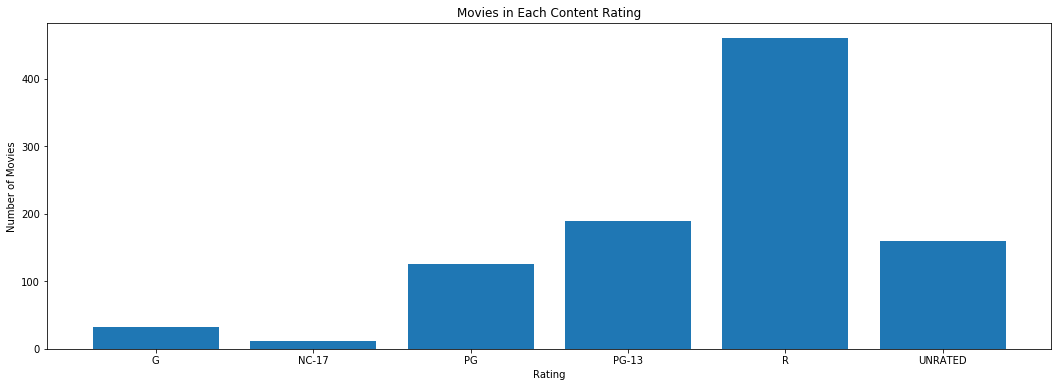

In [100]:
# Answer:
plt.figure(figsize=(18,6))
plt.bar(ratings.index,ratings.values);
plt.title('Movies in Each Content Rating');
plt.xlabel('Rating');
plt.ylabel('Number of Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [33]:
# Answer:
movies.loc[movies['content_rating'].isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP']), 'content_rating'] = 'UNRATED'

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [34]:
# Answer:
movies.loc[movies['content_rating'].isin(['X','TV-MA']), 'content_rating'] = 'NC-17'

#### Count the number of missing values in each column.

In [35]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.


In [36]:
# Answer:
movies[movies['content_rating'].isna()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


• Butch Cassidy and the Sundance Kid and Where Eagles Dare are rated PG, True Grit G (per imbd website).

In [37]:
movies.loc[[187,649],'content_rating'] = 'PG'
movies.loc[[936],'content_rating'] = 'G'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [38]:
# Answer:


long = movies.loc[movies['duration'] >= 120]
short = movies.loc[movies['duration'] < 120]

print("Two or more hrs: ", long['star_rating'].mean())
print("Less than two hrs: ", short['star_rating'].mean())

Two or more hrs:  7.948898678414082
Less than two hrs:  7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


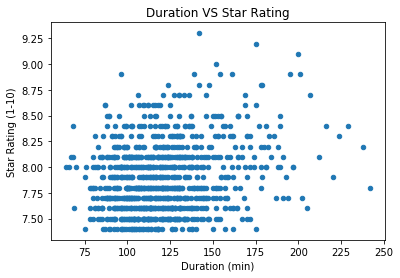

In [79]:
# Answer:
dur_by_stars = movies.plot(kind='scatter', x='duration', y='star_rating')
dur_by_stars.set_title('Star Rating VS Duration')
dur_by_stars.set_ylabel('Star Rating (1-10)')
dur_by_stars.set_xlabel('Duration (min)')
movies.corr()

#### • Very weak correlation between duration and star rating

#### Calculate the average duration for each genre.

In [28]:
# Answer:
movies.groupby('genre').mean().duration

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

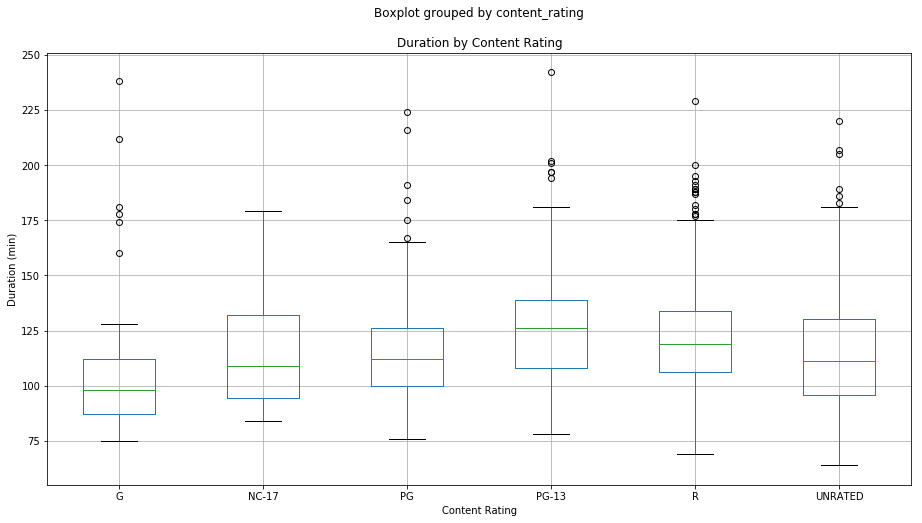

In [70]:
# Answer:
dur_by_rate = movies.boxplot(column='duration', by='content_rating',figsize=(15,8));
dur_by_rate.set_title('Duration by Content Rating');
dur_by_rate.set_ylabel('Duration (min)');
dur_by_rate.set_xlabel('Content Rating');

#### Determine the top rated movie (by star rating) for each genre.

In [58]:
# Answer:
movies.groupby('genre').max().loc[:,['title','star_rating']].sort_values(by='star_rating',ascending=False)

,title,star_rating
genre,,
Crime,Zodiac,9.3
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Biography,Walk the Line,8.9
Drama,Zulu,8.9
Western,Unforgiven,8.9
Animation,Wreck-It Ralph,8.6
Comedy,Zombieland,8.6
Horror,[Rec],8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [64]:
# Answer: 
title_counts = movies.title.value_counts() 
dup_titles = title_counts[title_counts.values >1].index
movies[movies['title'].isin(dup_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,G,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### • Entries for duplicate titles are different, so they are not true duplicates.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [49]:
# Answer:
genres = movies.genre.value_counts()
genres = genres[genres.values >=10]
movies.loc[movies['genre'].isin(genres.index)].groupby('genre').mean().star_rating.sort_values(ascending=False)

genre
Mystery      7.975000
Adventure    7.933333
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Comedy       7.822436
Horror       7.806897
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

#### Option 4: aggregate by count and mean, then filter using the count

## Bonus

#### Figure out something "interesting" using the actors data!